Saving cap.jpg to cap.jpg


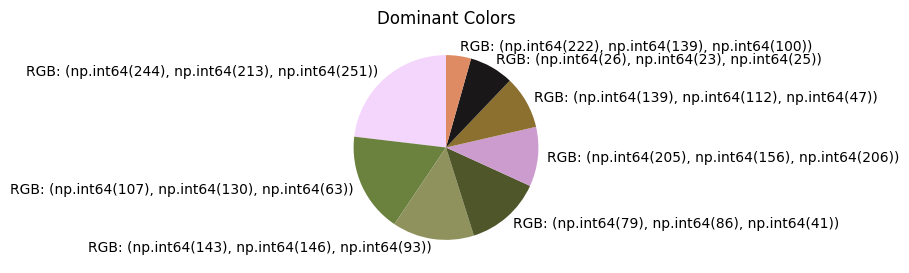

In [ ]:
# color_detection_colab.py

# Step 1: Upload the image
from google.colab import files
uploaded = files.upload()

# Step 2: Import required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Step 3: Read and preprocess the image
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)

if img is None:
    print("Error loading image. Try re-uploading.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (200, 200))  # Resize for faster processing
    img_flat = img_resized.reshape((-1, 3))  # Flatten to (pixels, channels)

    # Step 4: Apply KMeans to find dominant colors
    k = 8  # Number of colors
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(img_flat)
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_

    # Step 5: Count and plot colors
    _, counts = np.unique(labels, return_counts=True)
    sorted_idx = np.argsort(-counts)
    colors = colors[sorted_idx]
    counts = counts[sorted_idx]

    def plot_colors(palette, counts):
        plt.figure(figsize=(6, 3))
        plt.pie(counts, labels=[f'RGB: {tuple(color)}' for color in palette],
                colors=np.array(palette)/255, startangle=90)
        plt.title("Dominant Colors")
        plt.show()

    plot_colors(colors, counts)
